 # TCS Stock Data Analysis and Prediction

 #### Objective Analyze the historical data of TCS stock to gain insights into stock behavior, identify trends, and forecast future stock prices.


###  Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



### Load Dataset

In [2]:
# Load CSV file
df = pd.read_csv("TCS_stock_history.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4463 non-null   object 
 1   Open          4463 non-null   float64
 2   High          4463 non-null   float64
 3   Low           4463 non-null   float64
 4   Close         4463 non-null   float64
 5   Volume        4463 non-null   int64  
 6   Dividends     4463 non-null   float64
 7   Stock Splits  4463 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 279.1+ KB


In [4]:
# convert date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [5]:

df = df.sort_values('Date')
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [6]:
# Missing Values Analysis
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [7]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4463.000000,4463.000000,4463.000000,4463.000000,4.463000e+03,4463.000000,4463.000000
mean,866.936239,876.675013,856.653850,866.537398,3.537876e+06,0.071533,0.001344
std,829.905368,838.267104,821.233477,829.611313,3.273531e+06,0.965401,0.051842
min,24.146938,27.102587,24.146938,26.377609,0.000000e+00,0.000000,0.000000
25%,188.951782,191.571816,185.979417,188.594620,1.860959e+06,0.000000,0.000000
50%,530.907530,534.751639,525.616849,529.713257,2.757742e+06,0.000000,0.000000
75%,1156.462421,1165.815854,1143.622800,1154.784851,4.278625e+06,0.000000,0.000000
max,3930.000000,3981.750000,3892.100098,3954.550049,8.806715e+07,40.000000,2.000000


### Exploratory Data Analysis (EDA)

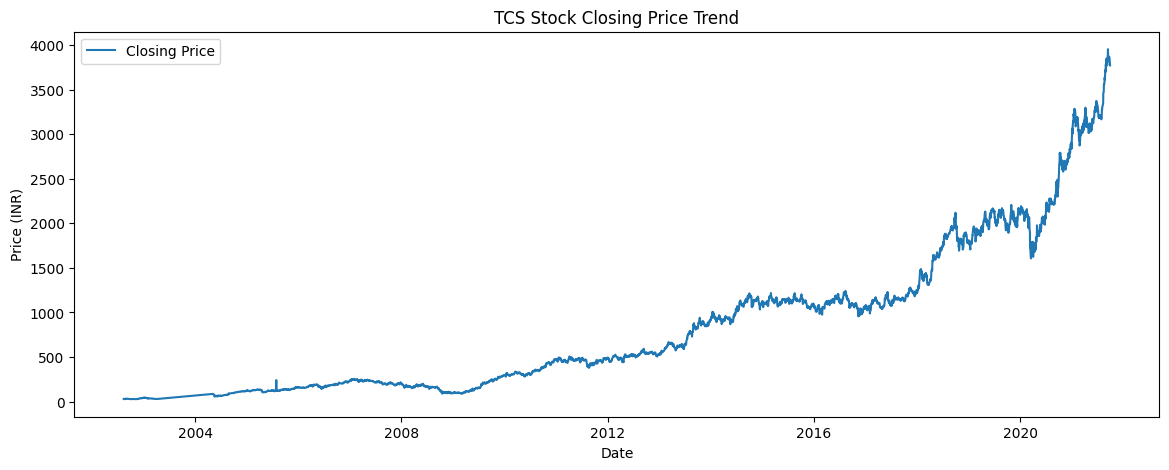

In [8]:
# Closing Price Trend
plt.figure(figsize=(14,5))
plt.plot(df['Close'], label='Closing Price')
plt.title('TCS Stock Closing Price Trend')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()


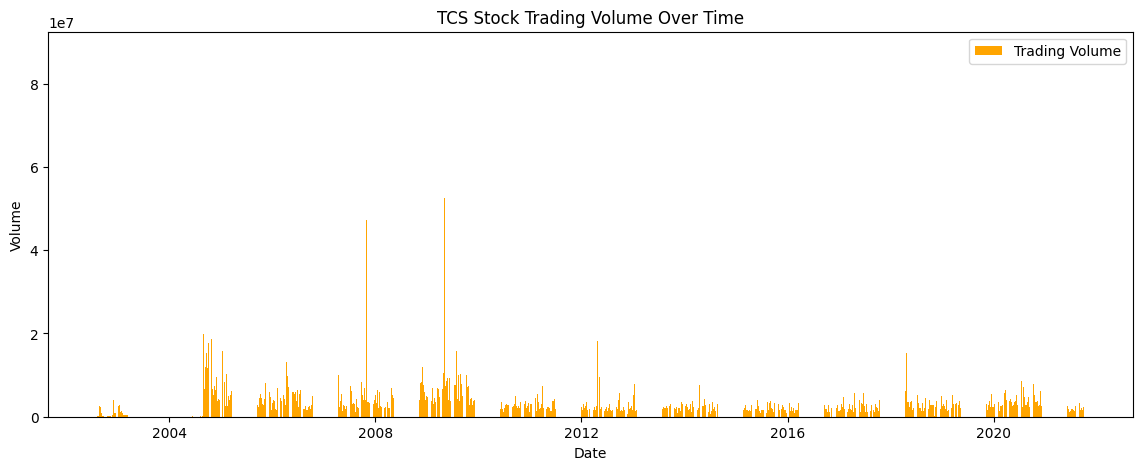

In [9]:
# Volume Analysis
plt.figure(figsize=(14,5))
plt.bar(df.index, df['Volume'], label='Trading Volume', color='orange')
plt.title('TCS Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

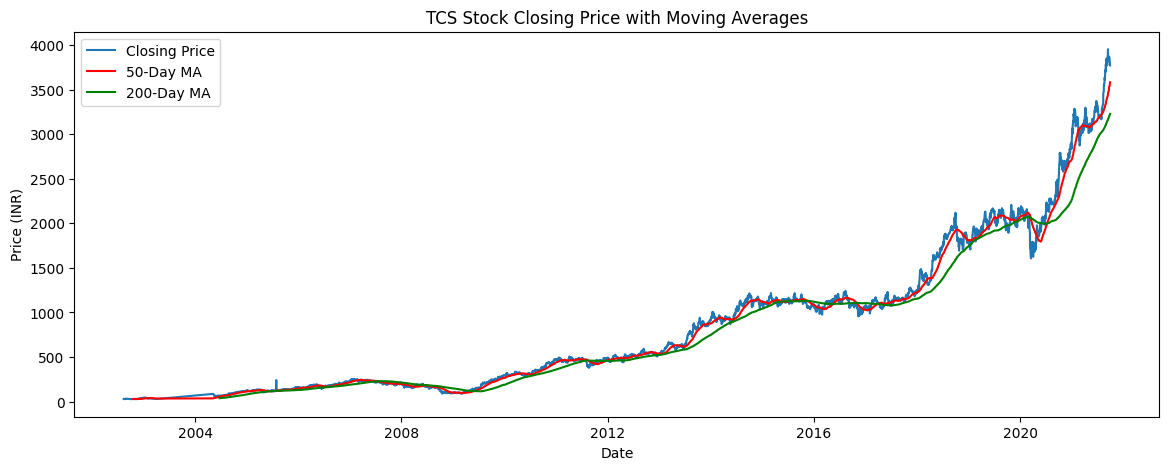

In [10]:
# Moving Averages (Trend Strength)
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(14,5))
plt.plot(df['Close'], label='Closing Price')
plt.plot(df['MA50'], label='50-Day MA', color='red')
plt.plot(df['MA200'], label='200-Day MA', color='green')
plt.title('TCS Stock Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()

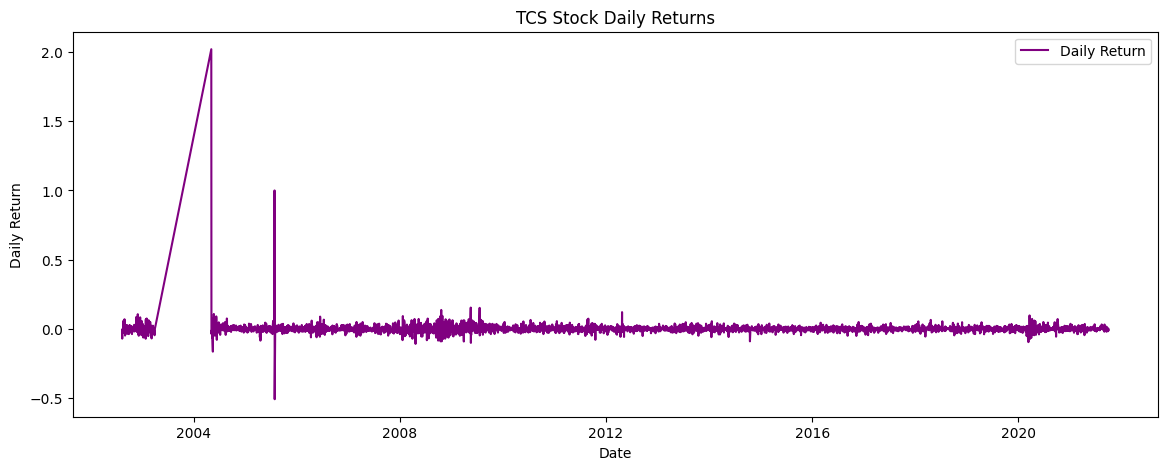

In [11]:
# Daily Returns (Risk Analysis)
df['Daily Return'] = df['Close'].pct_change()
plt.figure(figsize=(14,5))
plt.plot(df['Daily Return'], label='Daily Return', color='purple')
plt.title('TCS Stock Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

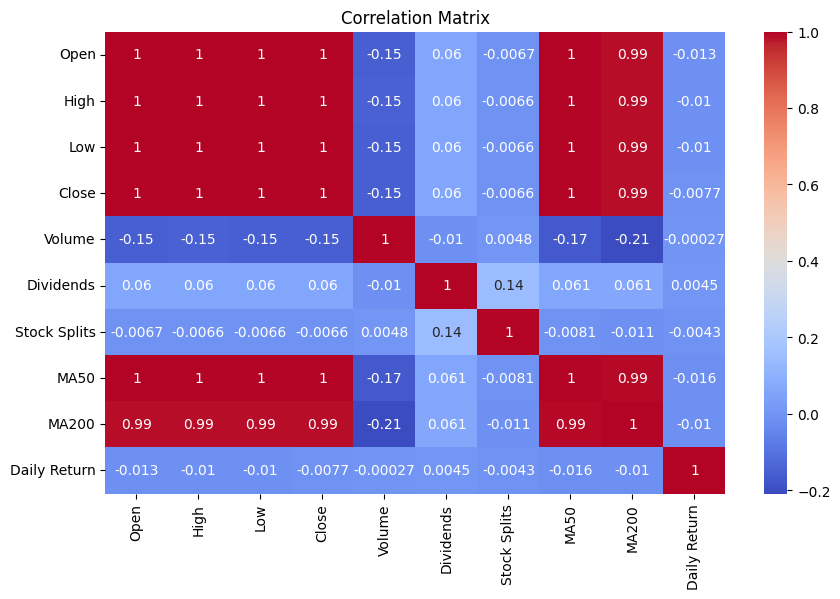

In [12]:
# Correlation Analysis
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Correlation of features with the target variable (Close Price)
correlation = df.corr()['Close'].sort_values(ascending=False)
print("Correlation of features with Closing Price:\n", correlation)

Correlation of features with Closing Price:
 Close           1.000000
High            0.999914
Low             0.999901
Open            0.999787
MA50            0.996965
MA200           0.989252
Dividends       0.060179
Stock Splits   -0.006635
Daily Return   -0.007654
Volume         -0.152844
Name: Close, dtype: float64
